## DSCI 100 - Introduction to Data Science


### Lecture 6 - Classification, an introduction using k-nearest neighbours


#### 2019-02-07

### First, a little housekeeping

<img align="left" src="https://media.giphy.com/media/3o7TKU8RvQuomFfUUU/giphy.gif" width="500" />

source: https://giphy.com/gifs/hollywoodsuite-robin-williams-mrs-doubtfire-3o7TKU8RvQuomFfUUU

1. Quiz grading will be finished Monday.

2. Feedback forms will now be returned to you on the server where you do your homework. At some point today in your home you will see a `feedback` folder. We will put all the forms there. 

3. Please fill out the mid-course survey (and if you already have THANK-YOU)!

4. Assignment to groups for group project has been done (see Canvas), and all have been given a private GitHub repository

### Reminder  

Where are we? Where are we going?

![](https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png)

*image source: [R for Data Science](https://r4ds.had.co.nz/) by Grolemund & Wickham*

## Classification problem

Can we use data we have seen in the past, to predict something about the future? 

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/unnamed-chunk-4-1.png" width="500"/>


For example, the diagnosis class of tumour cells with Concavity = 2 and Perimeter = 2?

## K-nearest neighbours classification algorithm

In order to classify a new observation using a k-nearest neighbor classifier, we have to do the follow steps:

1. Compute the distance between the new observation and each observation in our training set

2. Sort the data table in ascending order according to the distances.

3. Choose the top $k$ rows of the sorted table.

4. Classify the new observation based on majority vote.

## Classification problem

How is this problem represented as a data table in R?

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/bookdown-demo_files/figure-html/unnamed-chunk-4-1.png" width="500"/>


## Data table for example above

| $Y$  = diagnosis | $X_1$ = Concavity | $X_2$ = Perimeter |
|------------------|-------------------|-------------------|
| M | 2.1 | 2.3 |
| M | -0.1 | 1.5 |
| B | -0.2 | -0.2 |
| ... | ... | ... |


Where:
- $Y$ is our class label/target/outcome/response variable
- the $X$'s are our predictors/features/attributes/explanatory variables, and we have 2 of these
- we have 569 observations (sets of measurements about tumour cells)

## We can go beyond 2 predictors

https://ubc-dsci.github.io/introduction-to-datascience/classification.html#more-than-two-explanatory-variablespredictors

## Data table for example above

| $Y$  = diagnosis | $X_1$ = Concavity | $X_2$ = Perimeter |  $X_3$ = Symmetry |
|------------------|-------------------|-------------------|-------------------|
| M | 2.1 | 2.3 | 2.7 |
| M | -0.1 | 1.5 | -0.2 |
| B | -0.2 | -0.2 | 0.12 |
| ... | ... | ... |


Where:
- $Y$ is our class label/target/outcome/response variable
- the $X$'s are our predictors/features/attributes/explanatory variables, and we have 2 of these
- we have 569 observations (sets of measurements about tumour cells)

## Classification data table (general)

What does our general data table look like in the classification setting?

| $Y$   | $X_1$ | $X_2$ | $X_3$ | ... | $X_p$|
|-------|-------|-------|-------|-----|------|
| $y_1$ |$x_{1,1}$ | $x_{1,2}$ | $x_{1,3}$ | ... | $x_{1,p}$ |
| $y_2$ |$x_{2,1}$ | $x_{2,2}$ | $x_{2,3}$ | ... | $x_{2,p}$ |
| ... |... | ... | ... | ... | ... |
| $y_n$ |$x_{n,1}$ | $x_{n,2}$ | $x_{n,3}$ | ... | $x_{n,p}$ |

Where:
- $Y$ is our class label/target/outcome/response variable
- the $X$'s are our predictors/features/attributes/explanatory variables, and we have $p$ of these
- we have $n$ observations

## Introduction to `caret` package in R

Steps to doing k-nn with `caret` in R:

1. Split your data table of training data into $Y$ (make this a vector) and $X$'s (make this a `data.frame` not a `tibble`)

2. "Fit" your model to the data by:
  - choose $k$ and create a `data.frame` with one column (named `k`) and one value (your choice for $k$)
  - use `train` and feed it $X$, $Y$, the method ("knn"), and $k$

3. Predict $\hat{Y}$ using your model by using `predict` and passing it your model object and the new observation (as a `data.frame`)

### Code example:

1. Split your data table of training data into $Y$ and $X$'s


```
cancer_train <- cancer %>%
  select("Perimeter", "Concavity")

cancer_labels <- cancer %>% 
  select(Class) %>% 
  unlist()

```


2. "Fit" your model to the data:

```
k <- data.frame(k = 5)
model_knn <- train(x = data.frame(cancer_train), y = cancer_labels, method='knn', tuneGrid = k)
```


3. Predict $\hat{Y}$ using your model



```
new_obs <- data.frame(Perimeter = -1, Concavity = 4.2)
predict(object=model_knn, new_obs)
```

## Unanswered questions at this point:

1. How do we choose `k`? (answer coming next week...)

2. Is our model any good? 

*"All models are wrong, but some are useful"*
        -- George Box

... but we should try to say how useful (more coming next week...)

## Go forth and ... model?

<img align="left" src="https://media.giphy.com/media/SJOEsdVR1Zha8/giphy.gif" width="300" />

source: https://giphy.com/gifs/style-doll-SJOEsdVR1Zha8

In [ ]:
install.packages("e1071")

## Class challenge

Suppose we have a new observation in the iris dataset, with petal length = 5 and petal width = 0.5. Using R and the caret package, how would you classify this observation based on $k=3$ nearest neighbours using the predictors petal length and petal width.


In [6]:
library(tidyverse)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.7
✔ tidyr   0.8.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [11]:
Y_train <- select(iris, Species) %>% unlist()
X_train <- select(iris, Petal.Length, Petal.Width) %>% data.frame()
k = data.frame(k = 3)
model_knn <- train(x = X_train, y = Y_train, method='knn', tuneGrid = k)
new_obs <- data.frame(Petal.Length = 5, Petal.Width =  0.5)
predict(object=model_knn, new_obs)

[1] versicolor
Levels: setosa versicolor virginica

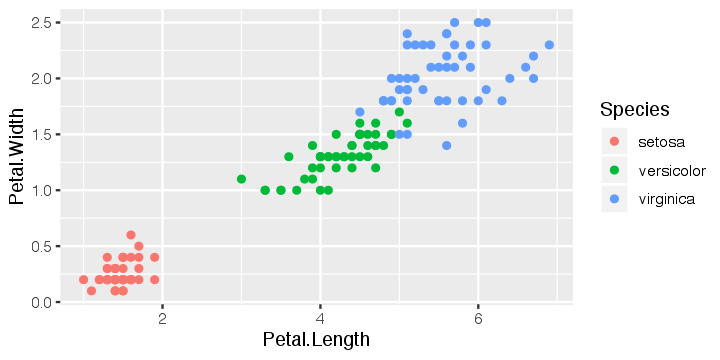

In [15]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
    geom_point()